There are many ways of feature selection : \
a. Using regularization to zero out a few weights [especially L1 regression] and cut down on a few features of low relevance. \
b. Sequential Backward Selection : Iteratively remove feature of lowest relevance till you have the required number of features / the performance of model does not go down by much. \
c. SFM : Use Random Forest to rank features in the order of their importance in the objective and select the ones with the maximum contribution. \

There is another method of feature selection - feature extraction. Summarizing the information contained in the original feature space by transforming them into other important features. \
Methods : \
PCA : Principal Component Analysis. \
LDA : Linear Discriminant Analysis. \
KPCA : Kernal Principal Component Analysis. \


PCA : linear transformation technique - used primarily for feature extraction and dimensionality reduction. other applications include exploratory data analyses, de-noising of signals. \
It helps find patterns in data based on correlation between features. \
PCA aims to find directions of maximum variance high-dimensional data and projects it onto a new subspace with equal or fewer dimensions than the original one.

If we use PCA for dimensionality reduction, we construct a kXn dimensional matrix which forms a map from n dimensional original data to k-dimensional projection which has the k features extracted from the d-dimensional data. [k < d]. The first projected feature will have highest variance, and then the other features will be of high variance as well and one more property is that the features are orthogonal to each other in the d-dimensional spce being completeley independent. \

PCA directions are highly sensitive to feature scaling and hence, the features have to normalized before PCA.

PCA algorithm : \
1. Standardize the dataset. \
2. construct the covariance matrix. \
3. Decompose the covariance matrix into eigen vector and eigen values. \
4. Sort the eigen values and choose eigen vector corresponding to the eigen values. \
5. Select the top k eigen values and their eigen vectors. \
6. Construct the projection matrix W from the top k eigen vectors. \
7. Transform the d-dimensional input dataset X using the projection matrix X to get the k-dimensional feature space.  

In [43]:
#PCA algorith step by step
import pandas as pd
df_wine = pd.read_csv('https://archive.ics.uci.edu/ml/'
                         'machine-learning-databases/wine/wine.data',
                         header=None)
df_wine.head()

,0,1,2,3,4,5,6,7,8,9,10,11,12,13
0,1,14.23,1.71,2.43,15.6,127,2.80,3.06,0.28,2.29,5.64,1.04,3.92,1065
1,1,13.20,1.78,2.14,11.2,100,2.65,2.76,0.26,1.28,4.38,1.05,3.40,1050
2,1,13.16,2.36,2.67,18.6,101,2.80,3.24,0.30,2.81,5.68,1.03,3.17,1185
3,1,14.37,1.95,2.50,16.8,113,3.85,3.49,0.24,2.18,7.80,0.86,3.45,1480
4,1,13.24,2.59,2.87,21.0,118,2.80,2.69,0.39,1.82,4.32,1.04,2.93,735


In [44]:
# split into train and test split
from sklearn.model_selection import train_test_split
y = df_wine.iloc[:,0].values
X = df_wine.iloc[:,1:].values

In [45]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, stratify=y,random_state = 42) 

In [46]:
print(X_train.shape)
print(X_test.shape)
print(y_test.shape)
print(y_train.shape)



(124, 13)
(54, 13)
(54,)
(124,)


In [47]:
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
X_train_std = sc.fit_transform(X_train)
X_test_std = sc.transform(X_test)


In [50]:
#constuction of covariance matrix  : this matrix stores the pairwise variance between two different features.
# sigma_jk = sum_{i=1}^n (x_i - mu_i)(x_j - mu_j)
# a postive covariane => features increase or decrease together, negative covariance => features move in opposite direction.
import numpy as np
cov_mat = np.cov(X_train_std.T) # each row in X_train_std is a feature
eigen_vals, eigen_vec = np.linalg.eig(cov_mat)
print(eigen_vals.shape), print(eigen_vec.shape)




(13,)
(13, 13)


(None, None)

In [81]:
cov_mat.shape

(13, 13)

In [51]:
print(eigen_vals)

[4.68272277 2.5174937  1.44251124 0.95025687 0.91388156 0.70002767
 0.59696802 0.09544816 0.14241154 0.31659155 0.22087117 0.26741076
 0.25909606]


Eigen vectors represent principal components [orthogonal axes] which represent directions of maximum variance and eigen values represent magnitude of that variance.


Note : The numpy.linalg.eig function was designed to operate on both symmetric and non-symmetric square matrices. However, you may find that it returns complex eigen values.
A related function, numpy.linalg.eigh, has been implemented to decompose Hermetian matrices, which is a numerically more stable approach to work with symmetric matrices such as the covariance matrix; numpy.linalg.eigh always returns real eigenvalues.

In [52]:
# experiment : use eigh to get eigen vectors and eigen values and compare it with eig outputs.
eigen_valsh, eigen_vech = np.linalg.eigh(cov_mat)
print((eigen_valsh - eigen_vals).sum())
print((eigen_vech - eigen_vec).sum())

1.1546319456101628e-14
-9.343279864225444


In [55]:
print(eigen_vals)

[4.68272277 2.5174937  1.44251124 0.95025687 0.91388156 0.70002767
 0.59696802 0.09544816 0.14241154 0.31659155 0.22087117 0.26741076
 0.25909606]


In [56]:
print(eigen_valsh)

[0.09544816 0.14241154 0.22087117 0.25909606 0.26741076 0.31659155
 0.59696802 0.70002767 0.91388156 0.95025687 1.44251124 2.5174937
 4.68272277]


eigh returns results with eigen values sorted. 
some additional info : \ 
eigh guarantees you that the eigenvalues are sorted and uses a faster algorithm that takes advantage of the fact that the matrix is symmetric. If you know that your matrix is symmetric, use this function.
Attention, eigh doesn't check if your matrix is indeed symmetric, it by default just takes the lower triangular part of the matrix and assumes that the upper triangular part is defined by the symmetry of the matrix.

eig works for general matrices and therefore uses a slower algorithm, you can check that for example with IPythons magic command %timeit. If you test with larger matrices, you will also see that in general the eigenvalues are not sorted here.

Let us check for the fastness with both eig and eigh

In [57]:
%%timeit
eigen_vals, eigen_vec = np.linalg.eig(cov_mat)

21.8 µs ± 110 ns per loop (mean ± std. dev. of 7 runs, 10,000 loops each)


In [58]:
%%timeit
eigen_valsh, eigen_vech = np.linalg.eigh(cov_mat)

10.5 µs ± 57.6 ns per loop (mean ± std. dev. of 7 runs, 100,000 loops each)


we see a 2X speedup with eigh since it assumes symmetric matrix and runs a faster algorithm


The idea is to choose a subset of feature space defined by the eigen vectors and eigen values and choose only the ones with maximum variance [since that will encode a large amount of information from the data].

Total and explained variance : \
Variance explained ratios is just the eigen value associated with a feature divided by the sum of eigen values. 
Explained varaince ratio = $\frac{\lambda _j}{\sum _{j=1}^{j=d} \lambda _j}$

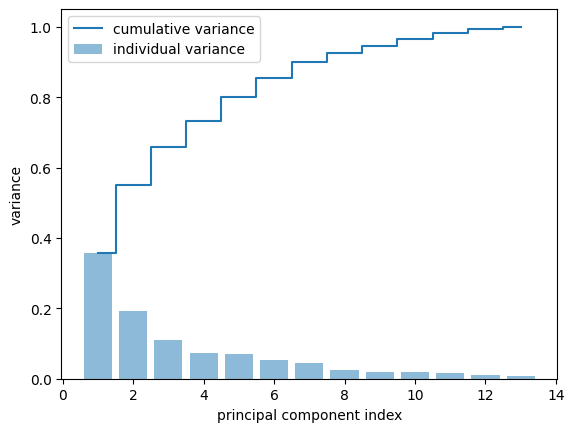

In [60]:
import matplotlib.pyplot as plt
tot = sum(eigen_vals)
exp_var = [(i/tot) for i in sorted(eigen_vals, reverse=True)]
cum_var = np.cumsum(exp_var)
plt.bar(range(1,14), exp_var,alpha=0.5, align='center',label='individual variance')
plt.step(range(1,14), cum_var, where='mid', label='cumulative variance')
plt.xlabel("principal component index")
plt.ylabel("variance")
plt.legend(loc="best")

the first principal component itself 40 percent of total variance and the first two combined hold 60 percent of variance. \

In the selectFromModel using randomForests, we used the best few features making use of class labels and hence that was supervised learning. Here, class labels are not supplied at all, we are trying to find a new feature space with maximum variance [densest info] based on the existing features of data.

The next steps are to pick top k eigen values and construct a matrix W with the k eigen vectors which is of shape kXd. then multiply with original dataset matrix to get reduced feature space dataset.

In [62]:
eig_pairs = [(np.abs(eigen_vals[i]), eigen_vec[:,i]) for i in range(len(eigen_vals))]
print(len(eig_pairs))

13


In [63]:
eig_pairs.sort(key=lambda x : x[0], reverse=True)

For easier visualization we choose the top two features which contain 60 percent of total variance. In practice, the number of principal components chosen is decided by the computational efficiency vs model performance metric.

In [64]:
eig_pairs[0][0]

4.6827227704729895

In [66]:
eig_pairs[0][1].shape

(13,)

In [67]:
eig_pairs[0][1][:,np.newaxis].shape

(13, 1)

In [68]:
W  = np.hstack((eig_pairs[0][1][:,np.newaxis], eig_pairs[1][1][:,np.newaxis]))

In [69]:
W.shape

(13, 2)

In [70]:
W

array([[ 0.15763477,  0.49414675],
       [-0.25237011,  0.1670862 ],
       [-0.01662626,  0.33581955],
       [-0.23514225, -0.0230456 ],
       [ 0.14285062,  0.2816766 ],
       [ 0.38989121,  0.07164769],
       [ 0.42596901,  0.00569565],
       [-0.28675917,  0.04855187],
       [ 0.30864294,  0.00589032],
       [-0.08886736,  0.52633004],
       [ 0.30119689, -0.28399523],
       [ 0.37783572, -0.18136641],
       [ 0.28836287,  0.3703045 ]])

W is the projection matrix created from the eigen vectors which will help us project the data points X to two dimensional principal component feature space.

In [71]:
X_train_std.shape

(124, 13)

124X13 matrix is projected to 124X2 matrix

In [72]:
X_train_pca = np.matmul(X_train_std, W)

In [75]:
y_train.shape,X_train_pca.shape

((124,), (124, 2))

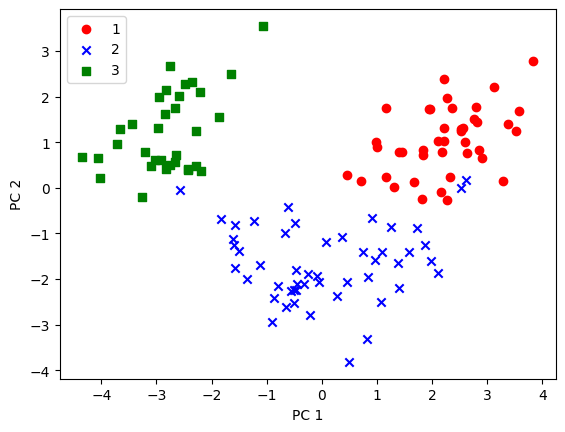

In [76]:
#visualization plot
colors = ['r','b','g']
markers = ['o','x', 's']
for label, color, marker in zip(np.unique(y_train), colors, markers):
    plt.scatter(X_train_pca[y_train == label,0], X_train_pca[y_train==label,1],  c = color, label=label, marker=marker)
plt.xlabel("PC 1")
plt.ylabel("PC 2")
plt.legend(loc="best")
plt.show()

The variance along PC1 is higher than variance along PC 2. upon glancing the data, a linear classifier might be able to classify the data into three classes easily.


/var/folders/pn/41l3cmvn0llckvh459j67qcw0000gn/T/ipykernel_1281/4290952262.py:20: UserWarning: *c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2D array with a single row if you intend to specify the same RGB or RGBA value for all points.
  plt.scatter(x=X[y == cl, 0],
/var/folders/pn/41l3cmvn0llckvh459j67qcw0000gn/T/ipykernel_1281/4290952262.py:20: UserWarning: You passed a edgecolor/edgecolors ('black') for an unfilled marker ('x').  Matplotlib is ignoring the edgecolor in favor of the facecolor.  This behavior may change in the future.
  plt.scatter(x=X[y == cl, 0],


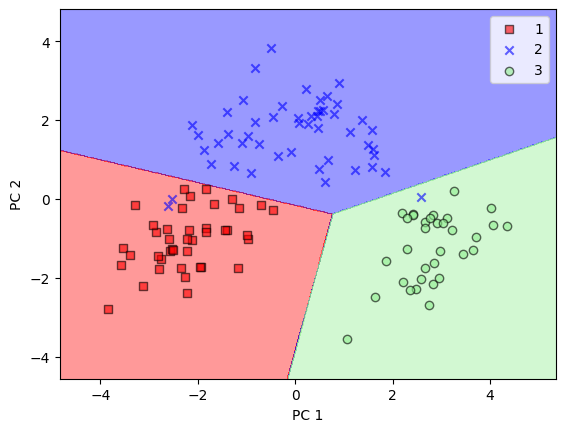

In [77]:
#Principal component analysis in sklearn
from matplotlib.colors import ListedColormap
def plot_decision_regions(X, y, classifier, resolution=0.02):
       # setup marker generator and color map
       markers = ('s', 'x', 'o', '^', 'v')
       colors = ('red', 'blue', 'lightgreen', 'gray', 'cyan')
       cmap = ListedColormap(colors[:len(np.unique(y))])
       # plot the decision surface
       x1_min, x1_max = X[:, 0].min() - 1, X[:, 0].max() + 1
       x2_min, x2_max = X[:, 1].min() - 1, X[:, 1].max() + 1
       xx1, xx2 = np.meshgrid(np.arange(x1_min, x1_max, resolution),
                              np.arange(x2_min, x2_max, resolution))
       Z = classifier.predict(np.array([xx1.ravel(), xx2.ravel()]).T)
       Z = Z.reshape(xx1.shape)
       plt.contourf(xx1, xx2, Z, alpha=0.4, cmap=cmap)
       plt.xlim(xx1.min(), xx1.max())
       plt.ylim(xx2.min(), xx2.max())
       # plot class samples
       for idx, cl in enumerate(np.unique(y)):
           plt.scatter(x=X[y == cl, 0],
                       y=X[y == cl, 1],
                       alpha=0.6,
                       c=cmap(idx),
                       edgecolor='black',
                       marker=markers[idx],
                       label=cl)

from sklearn.linear_model import LogisticRegression
from sklearn.decomposition import PCA
lr = LogisticRegression()
pca  = PCA(n_components = 2)
X_train_pca = pca.fit_transform(X_train_std)
lr.fit(X_train_pca,y_train)
plot_decision_regions(X_train_pca, y_train, classifier=lr)
plt.xlabel("PC 1")
plt.ylabel("PC 2")
plt.legend(loc='best')
plt.show()

The plot obtained from sklearn and custom implementation could be mirror images of each other -> this is due to eigen solver giving contrasting signs for eigen vectors and there is nothing inherently wrong in the implementations.
W.v = $\lambda$.v , also, W.-v = $\lambda$.-v

/var/folders/pn/41l3cmvn0llckvh459j67qcw0000gn/T/ipykernel_1281/4290952262.py:20: UserWarning: *c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2D array with a single row if you intend to specify the same RGB or RGBA value for all points.
  plt.scatter(x=X[y == cl, 0],
/var/folders/pn/41l3cmvn0llckvh459j67qcw0000gn/T/ipykernel_1281/4290952262.py:20: UserWarning: You passed a edgecolor/edgecolors ('black') for an unfilled marker ('x').  Matplotlib is ignoring the edgecolor in favor of the facecolor.  This behavior may change in the future.
  plt.scatter(x=X[y == cl, 0],


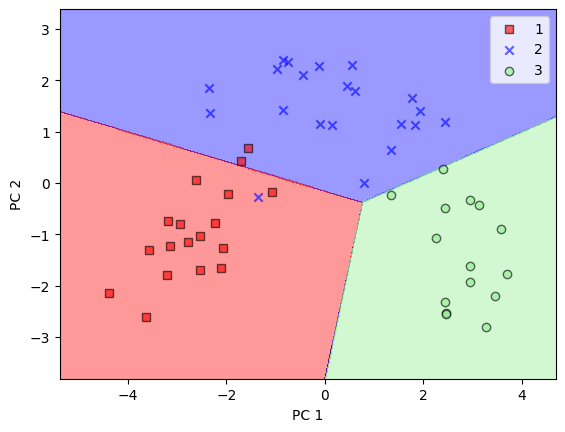

In [79]:
#testing it out on the test set
X_test_pca = pca.transform(X_test_std)
plot_decision_regions(X_test_pca, y_test, classifier=lr)
plt.xlabel("PC 1")
plt.ylabel("PC 2")
plt.legend(loc='best')
plt.show()

The performance is decent with some misclassifications for the red samples which appear in the blue region.

If with sklearn's implementation, if we want the explained ratios of all features, simply pass n_features = None.

In [80]:
pca = PCA(n_components=None)
X_train_pca = pca.fit_transform(X_train_std)
pca.explained_variance_ratio_

array([0.35730453, 0.19209164, 0.11006755, 0.07250719, 0.06973166,
       0.05341402, 0.04555029, 0.0241568 , 0.02040417, 0.01976974,
       0.01685307, 0.01086639, 0.00728295])

Supervised data compression using Linear Discriminant Analysis (LDA)

Linear Discriminant Analysis (LDA) can be used as a technique for feature extraction to increase computational efficieny , reduce the degree of overfitting due to the curse of dimensionality in non-regularized models. Whereas PCA attempts to find orthogonal components with maximum variance, LDA tries to extract features maximizing class separability.